# Generating noisy images

In [30]:
#Importes
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from skimage import io
import skimage

print('imports successfull')

imports successfull


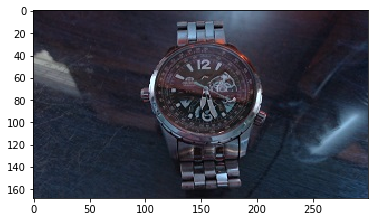

In [31]:
#Reading the image
img=cv2.imread('watch.jpg',cv2.IMREAD_COLOR)
plt.imshow(img)
plt.show()

# 1st Method
Following generates gaussian noise and applies it to the image in additive manner.

In [32]:
def gaussian_noise(img):
    mean=28
    var=100
    sigma=var**0.5
    gaussian=np.random.normal(mean,sigma,(img.shape[0],img.shape[1]))  #Generate randome noise
    noise_img=np.zeros(img.shape,dtype=np.float32)
    
    noise_img[:,:,0]=img[:,:,0]+gaussian
    noise_img[:,:,1]=img[:,:,1]+gaussian
    noise_img[:,:,2]=img[:,:,2]+gaussian
    cv2.normalize(noise_img,noise_img,0,255,cv2.NORM_MINMAX,dtype=-1)
    noise_img=noise_img.astype(np.uint8)
    return noise_img

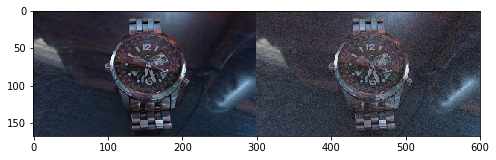

In [33]:
#applying the noise
noise=gaussian_noise(img)

plt.figure(figsize=(8,10))
plt.imshow(np.hstack((img,noise)))
plt.savefig('E:/Denoising/Results/noiseGenerator.pdf')
plt.show()
plt.close()

# 2nd Method
Following generates gaussian noise and applies it to the image in additive manner. But in a different manner
1. gaussian noise added over image: noise is spread throughout
2. gaussian noise multiplied then added over image: noise increases with image value
3. image folded over and gaussian noise multipled and added to it: peak noise affects mid values, white and black receiving        little noise

In [34]:
def add_gaussian_noise(img,noise):
    # noise overlaid over image
    noisy = np.clip((img + noise*0.075),0,1)
    noisy2 = np.clip((img + noise*0.095),0,1)

    # noise multiplied by image:
    # whites can go to black but blacks cannot go to white
    noisy1mul = np.clip((img*(1 + noise*0.28)),0,1)
    noisy2mul = np.clip((img*(1 + noise*0.32)),0,1)

    # noise multiplied by bottom and top half images,
    # whites stay white blacks black, noise is added to center
    img2 = img*2
    n1 = np.clip(np.where(img2 <= 1, (img2*(1 + noise*0.25)), (1-img2+1)*(1 + noise*0.25)*-1 + 2)/2, 0,1)
    n2 = np.clip(np.where(img2 <= 1, (img2*(1 + noise*0.35)), (1-img2+1)*(1 + noise*0.35)*-1 + 2)/2, 0,1)


    # norm noise for viz only
    noise2 = (noise - noise.min())/(noise.max()-noise.min())
    return (noisy,noisy2,noisy1mul,noisy2mul,n1,n2,noise2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


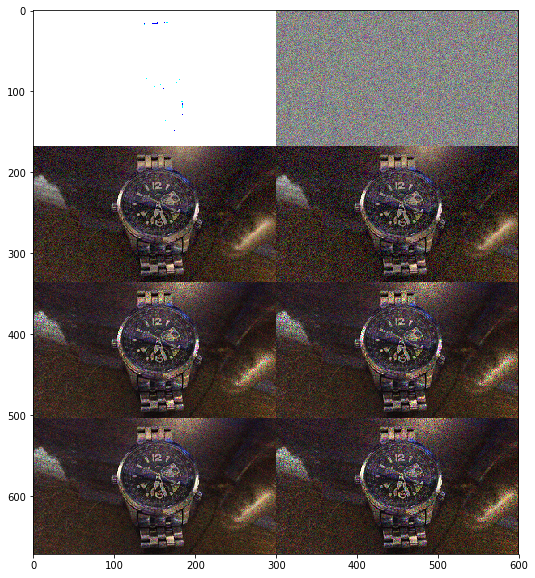

<function matplotlib.pyplot.close(fig=None)>

In [35]:
#applying the noise
image=img[...,::-1]/255.0
noise =  np.random.normal(loc=0, scale=1, size=img.shape)
noisy,noisy2,noisy1mul,noisy2mul,n1,n2,noise2=add_gaussian_noise(image,noise)
plt.figure(figsize=(10,10))
plt.imshow(np.vstack((np.hstack((img, noise2)),
                        np.hstack((noisy, noisy2)),
                        np.hstack((noisy1mul, noisy2mul)),
                        np.hstack((n1, n2)))))
plt.show()
plt.close

# 3rd Method
 using skimage functions 

In [36]:
def add_ski_noise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

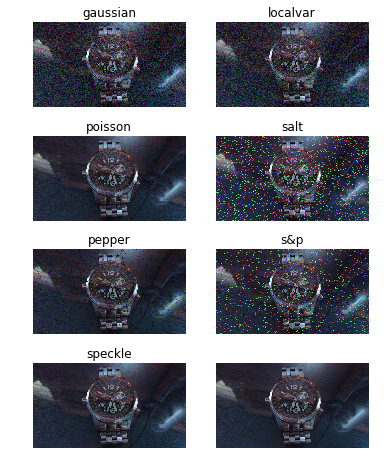

In [37]:
plt.figure(figsize=(6,8))
r,c=4,2
add_ski_noise(img,'gaussian',r,c,1)   #gaussian distributed random additive noise
add_ski_noise(img,'localvar',r,c,2)   #gaussian distributed random additive noise with specified local vaiance at each piont
add_ski_noise(img, "poisson", r,c,3)  #poisson distributed noise generated by image
add_ski_noise(img, "salt", r,c,4)     #replace random pixels with 1
add_ski_noise(img, "pepper", r,c,5)   #replace random pixels with 0
add_ski_noise(img, "s&p", r,c,6)      #replace random pixels with 0 and 1
add_ski_noise(img, "speckle", r,c,7)  #multiplicative noise (img=img+n*img) with sepcified mean and variance
add_ski_noise(img, None, r,c,8)
plt.show()